In [0]:
# Group: Mountain Chan, Richard Watson

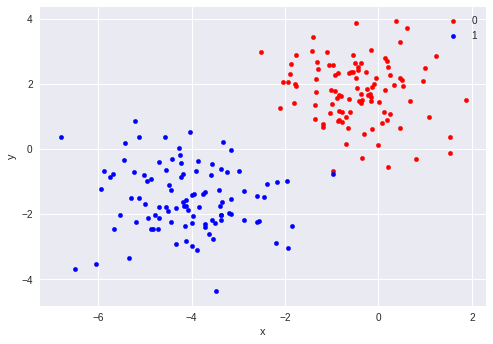

In [72]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
import numpy as np            
import matplotlib.pyplot as plt   

Data_set_size=200
X, Y = make_blobs(n_samples=Data_set_size, centers=2, n_features=2,cluster_std=1.0, center_box=(-4.0, 4.0),random_state=1)
dataX, dataY = X, Y
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
pyplot.show()

In [0]:
def sigmoid(xp, W):
  z = xp[0] * W[0] - xp[1] + W[1]
  return 1/(1+np.exp(-z))

def dJ(W,x,y):
  total = x.shape[0]
  return 1/total * np.sum(x[i,:] * (sigmoid(x[i,:],W) - y[i]) for i in range(total))

(-4, 4)

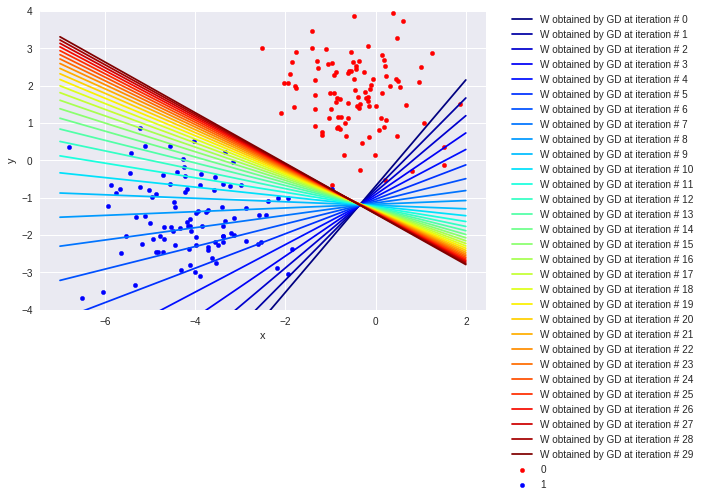

In [47]:
from pandas import DataFrame
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

fig1, ax1 = plt.subplots()

alpha = 0.1
n_iteration = 30

colorsspec = plt.cm.jet(np.linspace(0,1,n_iteration))

np.random.seed(seed = 1)
W = np.random.randn(2,1)[:,0]

for iteration in range(n_iteration):
  gradients = dJ(W,X,Y)
  W = W - alpha * gradients
  x = np.linspace(-7,2,10)
  y = x*W[0] + W[1]
  ax1.plot(x,y,color=colorsspec[iteration],label="W obtained by GD at iteration # %d"%iteration)

colors = {0:'red', 1:'blue'}
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax1, kind='scatter', x='x', y='y', label=key, color=colors[key])

ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1.set_ylim(-4,4)

(-4, 4)

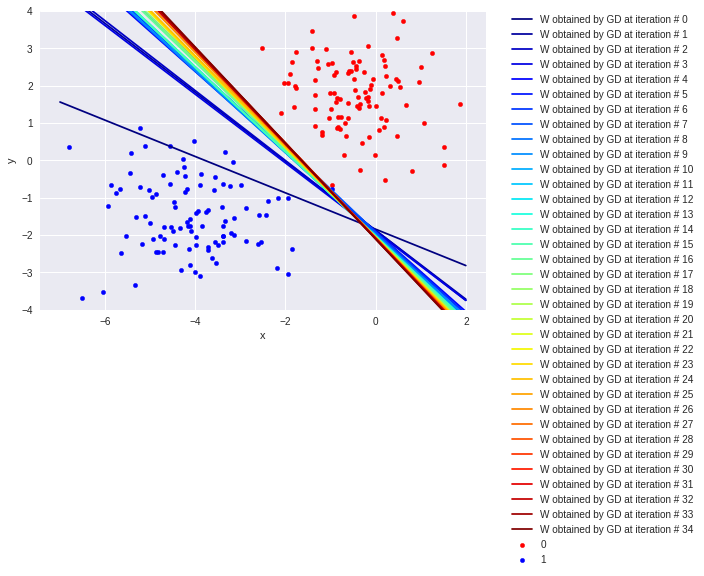

In [59]:
# Stochastic 
def learning_schedule(t):
    return t0 / (t + t1)

fig2, ax2 = plt.subplots()

n_iteration = 35
t0 = 7
t1 = 20

colorsspec = plt.cm.jet(np.linspace(0,1,n_iteration))

np.random.seed(seed = 1)
W = np.random.randn(2,1)[:,0]

for iteration in range(n_iterations):
  rand = np.random.randint(Data_set_size)
  x_rand = X[rand:rand+1,:]
  y_rand = Y[rand:rand+1]
  gradients = dJ(W,x_rand,y_rand)
  alpha = learning_schedule(iteration)
  W = W - alpha * gradients
  y = x*W[0] + W[1]
  ax2.plot(x,y,color=colorsspec[iteration],label="W obtained by GD at iteration # %d"%iteration)

colors = {0:'red', 1:'blue'}
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax2, kind='scatter', x='x', y='y', label=key, color=colors[key])

ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax2.set_ylim(-4,4)

(-4, 4)

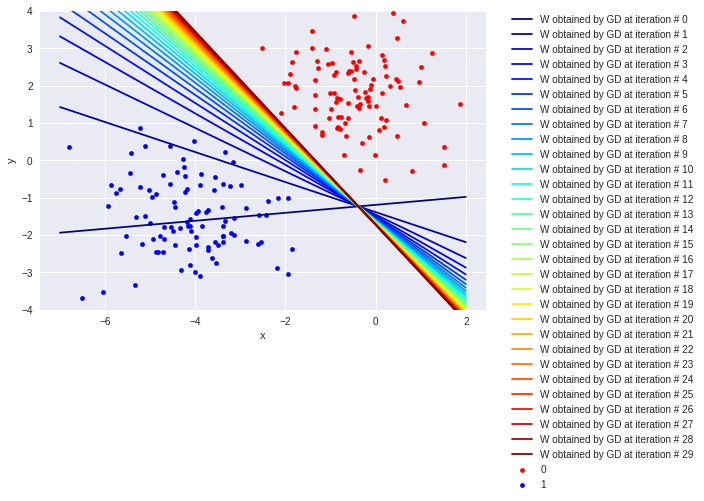

In [71]:
#mini batch
def learning_schedule(t):
    return t0 / (t + t1)

fig3, ax3 = plt.subplots()

n_iteration = 30
minibatch_size = 50
t0 = 100
t1 = 1000

colorsspec = plt.cm.jet(np.linspace(0,1,n_iteration))

np.random.seed(seed = 1)
W = np.random.randn(2,1)[:,0]

t = 0
for iteration in range(n_iteration):
  shuffled = np.random.permutation(Data_set_size)
  x_shuffled = X[shuffled,:]
  y_shuffled = Y[shuffled]
  for i in range(0,Data_set_size,minibatch_size):
    t += 1
    x_indices = x_shuffled[i:i+minibatch_size,:]
    y_indices = y_shuffled[i:i+minibatch_size]
    gradients = dJ(W,x_rand,y_rand)
    alpha = learning_schedule(iteration)
    W = W - alpha * gradients
  x = np.linspace(-7,2,10)
  y = x*W[0] + W[1]
  ax3.plot(x,y,color=colorsspec[iteration],label="W obtained by GD at iteration # %d"%iteration)

colors = {0:'red', 1:'blue'}
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax3, kind='scatter', x='x', y='y', label=key, color=colors[key])

ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax3.set_ylim(-4,4)